## Loading libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa, librosa.display, IPython.display as ipd
import numpy as np
import json
from AM_downloadDataset import read_data
from mutagen.mp3 import MP3
from statistics import mean, median
import noisereduce as nr

/Users/ja/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


## Loading data 

In [11]:
countries = ['Poland']

bird = {
        'gen':'Emberiza',
        'spec':'Citrinella',
        'country':countries
        }

path = '../data/xeno-canto-dataset/' +bird['gen']+bird['spec']+'/'+bird['country'][0]
idData = read_data('id', path)

## Configuration of mel spectograms

In [2]:
N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024      # Number of audio frames between STFT columns
SR = 44100           # Sampling frequency
N_MELS = 40          # Mel band parameters   
WIN_SIZE = 1024      # number of samples in each STFT window
WINDOW_TYPE = 'hann' # the windowin function
FEATURE = 'mel'      # feature representation
plt.rcParams['figure.figsize'] = (10,4)

## Creating 5 sec spectograms with reduced noise

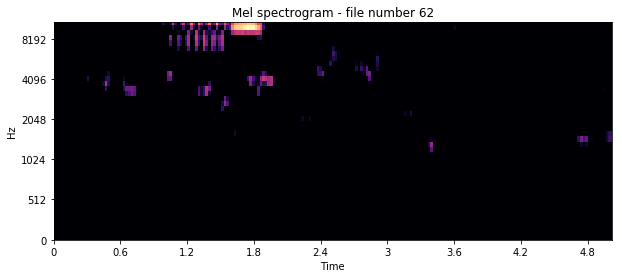

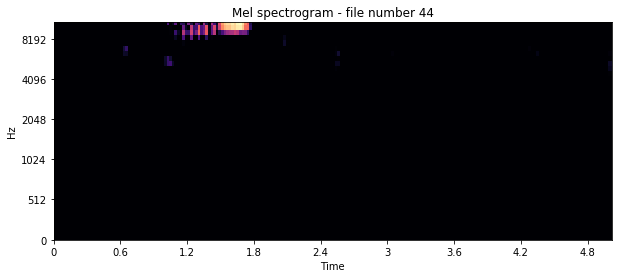

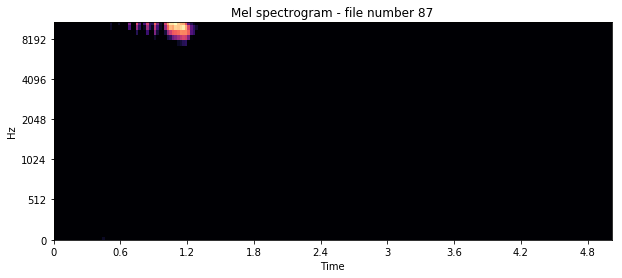

In [10]:
randFiles = [62, 44, 87]
for audioFile in randFiles:
        filePath = path+'/'+bird['gen']+bird['spec']+idData[audioFile]+'.mp3'
        y, sr = librosa.load(filePath,duration=10,mono=True)
        
        y = nr.reduce_noise(audio_clip=y, noise_clip=y, prop_decrease = 1, verbose=False)

        plt.figure()
        librosa.display.specshow(
            librosa.core.amplitude_to_db(
                librosa.feature.melspectrogram(
                                y=y, 
                                S=np.abs(
                                    librosa.stft(
                                        y, n_fft = N_FFT, 
                                        hop_length = HOP_SIZE, 
                                        window = WINDOW_TYPE, 
                                        win_length = WIN_SIZE)
                                        )**2, 
                                sr=SR, 
                                n_fft=N_FFT, 
                                hop_length=HOP_SIZE, 
                                n_mels=N_MELS, 
                                htk=True, 
                                fmin=0.0, 
                                fmax=sr/2.0), 
                    ref=1.0),
                sr=SR,
                hop_length=HOP_SIZE, 
                x_axis='time', 
                y_axis='mel')
        
        plt.title('Mel spectrogram - file number '+str(audioFile))
        plt.show()